<a href="https://colab.research.google.com/github/NJena404/Deep-Learning/blob/main/Deep_Learning(Early_stopping).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early stopping

**In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error. Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit.**

In [20]:
#Library import

import tensorflow as tf
import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [21]:
x,y=make_circles(n_samples=100,noise=.1,random_state=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


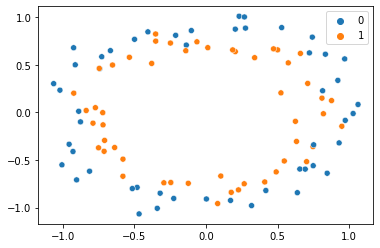

In [22]:
sns.scatterplot(x[:,0],x[:,1],hue=y)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2)

In [24]:
#Model building
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=3500,verbose=0)

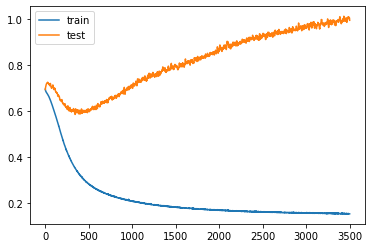

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


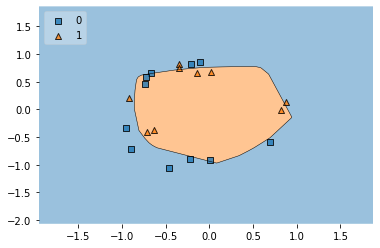

In [28]:
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)
plt.show()

# Early stopping

In [29]:
#Model building
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [34]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2000,callbacks=callback)

Epoch 1/2000
3/3 [==============================] - 0s 30ms/step - loss: 0.6678 - accuracy: 0.6000 - val_loss: 0.7202 - val_accuracy: 0.4000
Epoch 2/2000
3/3 [==============================] - 0s 17ms/step - loss: 0.6671 - accuracy: 0.6000 - val_loss: 0.7199 - val_accuracy: 0.4500
Epoch 3/2000
3/3 [==============================] - 0s 14ms/step - loss: 0.6664 - accuracy: 0.6125 - val_loss: 0.7186 - val_accuracy: 0.5000
Epoch 4/2000
3/3 [==============================] - 0s 13ms/step - loss: 0.6659 - accuracy: 0.6250 - val_loss: 0.7170 - val_accuracy: 0.5000
Epoch 5/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.6651 - accuracy: 0.6250 - val_loss: 0.7162 - val_accuracy: 0.5000
Epoch 6/2000
3/3 [==============================] - 0s 16ms/step - loss: 0.6644 - accuracy: 0.6250 - val_loss: 0.7153 - val_accuracy: 0.5000
Epoch 7/2000
3/3 [==============================] - 0s 19ms/step - loss: 0.6637 - accuracy: 0.6375 - val_loss: 0.7145 - val_accuracy: 0.5000
Epoch 8/2000


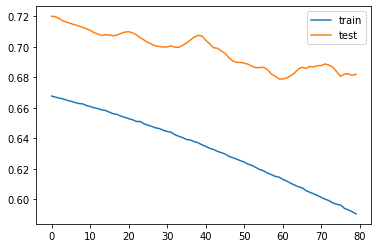

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


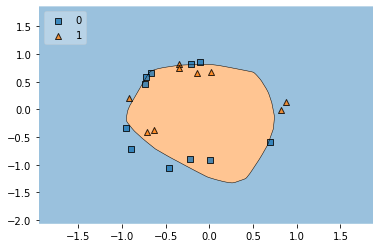

In [36]:
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)
plt.show()